<a href="https://colab.research.google.com/github/SeohyunLyoo/handson-ml3/blob/main/03_02_%EB%8B%A4%EC%A4%91_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
data = fetch_openml('mnist_784', as_frame=False)
data.data

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
X, y = data.data, data.target
X.shape, y.shape

((70000, 784), (70000,))

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
svc = SVC(random_state=42)
svc.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [8]:
svc.predict([X_test[1]])

array(['2'], dtype=object)

In [9]:
def plot_image(data):
  image = data.reshape(28, 28)
  plt.imshow(image, cmap='binary')
  plt.axis('off')
  plt.show()


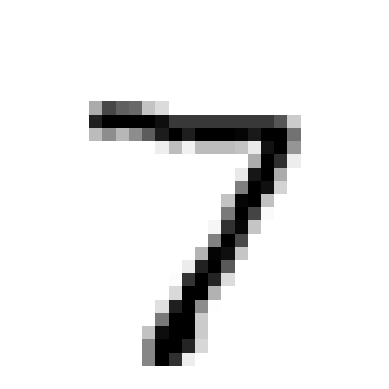

In [11]:
plot_image(X_test[0])

In [12]:
digit_score = svc.decision_function([X_test[0]])
digit_score.round(2)

array([[ 2.78, -0.29,  6.18,  7.24,  4.78,  3.86,  0.71,  9.31,  1.76,
         8.27]])

In [13]:
class_id = digit_score.argmax()
class_id

7

In [14]:
svc.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [15]:
svc_ovr = OneVsRestClassifier(SVC(random_state=42))
svc_ovr.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [16]:
svc_ovr.predict([X_train[0]])

array(['5'], dtype='<U1')

In [17]:
svc_ovr.decision_function([X_test[0]]).round(2)

array([[-1.35, -2.06, -1.42, -1.29, -1.91, -1.43, -2.11,  1.52, -1.65,
        -1.74]])

In [18]:
ovr_id = svc_ovr.decision_function([X_test[0]])
ovr_id.argmax()

7

In [19]:
svc_ovr.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [20]:
svc_ovr.estimators_

[SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42),
 SVC(random_state=42)]

In [21]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train[:2000], y_train[:2000])

SGDClassifier(random_state=42)

In [22]:
sgd.predict([X_test[0]])

array(['7'], dtype='<U1')

In [24]:
sgd.decision_function([X_test[0]])

array([[-1531203.60245942, -2703956.7772486 ,  -924258.85708197,
         -401171.88135995, -1733988.74587617, -1315410.43179203,
        -4529543.97471197,  1704485.99227791,  -729567.78647335,
         -843155.26486454]])

In [25]:
cross_val_score(sgd, X_train[:2000], y_train[:2000], cv=3, scoring='accuracy')

array([0.84857571, 0.80809595, 0.84084084])

In [26]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train.astype("float64"))

cross_val_score(sgd, X_train_sc[:2000], y_train[:2000], cv=3, scoring='accuracy')

array([0.84857571, 0.82008996, 0.85885886])

In [28]:
y_train_pred = cross_val_predict(sgd, X_train_sc[:2000], y_train[:2000], cv=3)

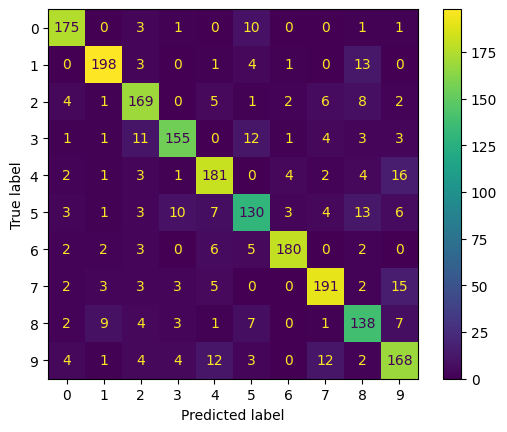

In [30]:
ConfusionMatrixDisplay.from_predictions(y_train[:2000], y_train_pred)
plt.show()

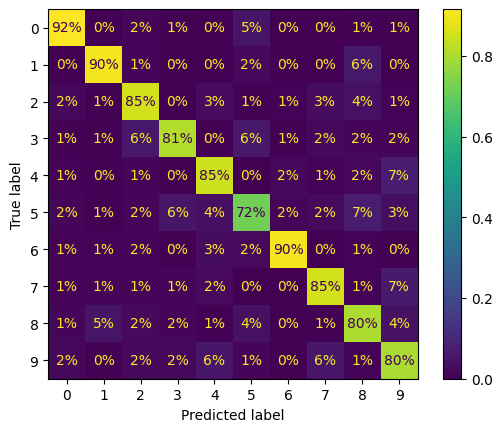

In [31]:
ConfusionMatrixDisplay.from_predictions(y_train[:2000], y_train_pred, normalize='true', values_format='.0%')
plt.show()

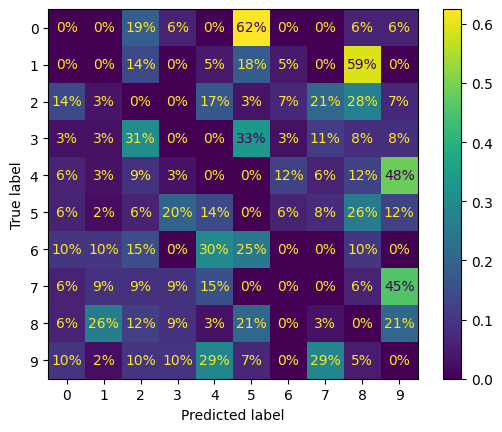

In [32]:
sample_weights = (y_train[:2000] != y_train_pred)

ConfusionMatrixDisplay.from_predictions(y_train[:2000], y_train_pred, sample_weight=sample_weights, normalize='true', values_format='.0%')

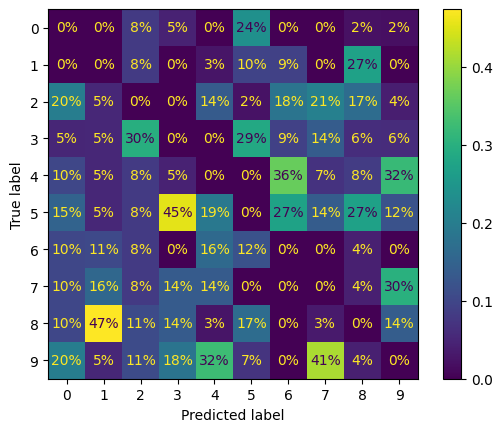

In [33]:
sample_weights = (y_train[:2000] != y_train_pred)

ConfusionMatrixDisplay.from_predictions(y_train[:2000], y_train_pred, sample_weight = sample_weights, normalize='pred', values_format='.0%')
plt.show()